### Name: Dat Ho

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
# Ignore all future warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("stock_data.csv")
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [3]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains 340 rows and 15 columns


<IPython.core.display.Javascript object>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

**Observations:**
- There are 4 columns of categorical data, and 11 columns of numerical data.

In [5]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

- No missing data

In [6]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplication

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

**Observations:**
- There are 340 unique ticket symbols.
- There are 340 unique security values.
- There are 11 unique GICS Sector values. Industrials is the most frequent sector (53).
- There are 104 unique GICS Sub Industry. Oil & Gas Exploration & Production is the most frequent sub industry (16).
- The average current stock price is 80.86 dollars. The minimum current stock price is 4.50 dollars. The maximum current stock price is 1274.95 dollars.
- The average percentage change in the stock price is 4.08%.
- The average volatility is 1.52. The minimum volatility is 0.73. The maximum volatility is 4.58.
- The avergage ROE is 39.59%. The minimum ROE is 1% and maximum ROE is 917%.
- The average Cash ratio is 70.02.
- The average net cash flow is 55,537,620.58 dollars. The minimum net cash flow is -11,208,000,000.0 dollars indicating  company's cash outflows exceed its cash inflows. The maximum net cash flow is 20,764,000,000.0 dollars indicating a company's cash inflows exceed its cash outflows.
- The average net income is 1,494,384,602.94 dollars. The mimimum net income is -2,352,800,0000 dollars. The maximum net income is 24,442,000,000 dollars.
- The average earnings per share is 2.77 dollars. The minimum earnings per share is -61.2 dollars. The maximum earnings per share is 50.09 dollars.
- The average estimated shares outstanding is 577,028,337 shares. The minimum is 27,672,156 shares and the maximum is  6,159,292,035 shares.
- The average P/E ratio is 32.61, minimum is 2.93, maximum is 528.04.
- The average P/B ratio is -1.71, minimum is -76.12, maximum is 129.06.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [8]:
# create a copy of the data
df = data.copy()

<IPython.core.display.Javascript object>

**Define functions for visualization:**
- histogram_boxplot displays boxplot and histogram combined.
- labeled_barplot displays barplot with percentage at the top.

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [10]:
def labeled_barplot(df, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### **Note**: The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**What does the distribution of stock prices look like?**

In [44]:
df["Current Price"].describe()

count     340.000000
mean       80.862345
std        98.055086
min         4.500000
25%        38.555000
50%        59.705000
75%        92.880001
max      1274.949951
Name: Current Price, dtype: float64

<IPython.core.display.Javascript object>

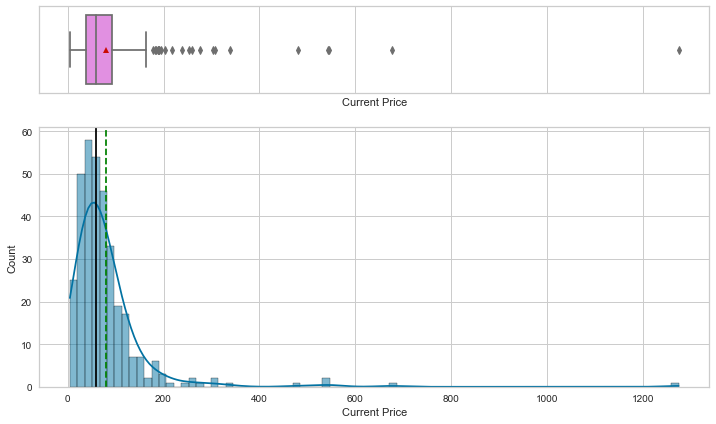

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(df, "Current Price")

In [46]:
df.groupby(["GICS Sector"])["Current Price"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,128.095404,223.699868,14.090000,36.379998,67.200001,102.177500,1274.949951
Consumer Staples,19.0,71.972807,25.919826,36.680000,47.246666,78.949997,91.234997,127.300003
Energy,30.0,46.042334,28.130190,4.500000,24.622501,39.255001,69.935000,105.370003
Financials,49.0,58.659183,32.230325,11.060000,33.480000,54.360001,72.180000,159.759995
Health Care,40.0,132.048250,116.442990,18.440001,67.174997,101.889999,142.970005,546.159973
Industrials,53.0,74.411807,44.926615,7.398807,45.099998,61.310001,92.680000,217.149994
Information Technology,33.0,63.548485,52.576790,10.630000,27.600000,52.630001,87.360001,276.570007
Materials,20.0,76.551500,56.122029,6.770000,40.007500,67.055000,99.715001,259.600006
Real Estate,27.0,90.976925,70.263134,15.340000,36.198480,80.690002,106.470001,302.399994


<IPython.core.display.Javascript object>

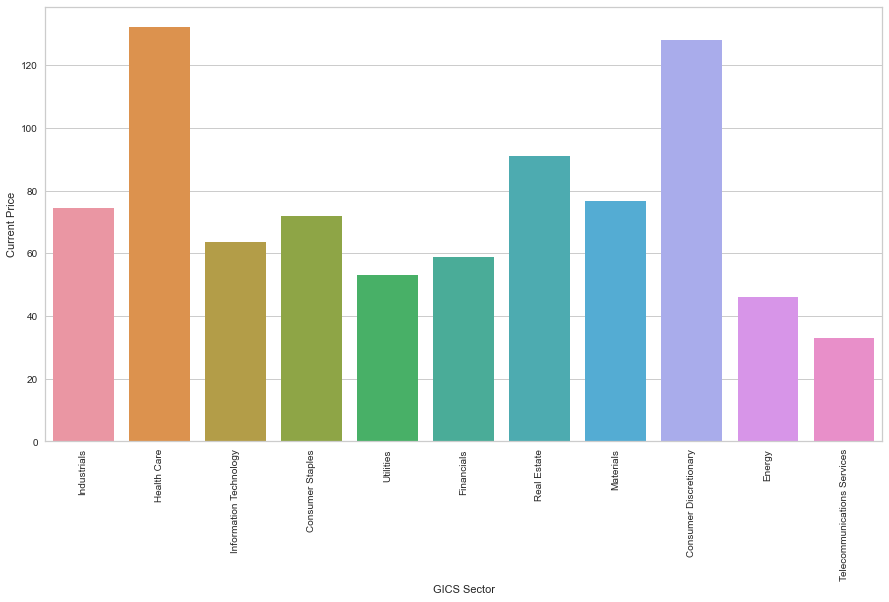

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Current Price", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The average current stock price is 81 dollars. The highest current stock price is 1275 dollars.
- Across all sectors, the Healthcare sector's average current stock price is 132 dollars and is the sector with the highest average current stock price, follows by the Consumer Discretionary sector (128 dollars).
- The Telecommunication Services sector has the lowest average current stock price at 33 dollars.

**The stocks of which economic sector have seen the maximum price increase on average?**

In [48]:
df.groupby(["GICS Sector"])["Price Change"].mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

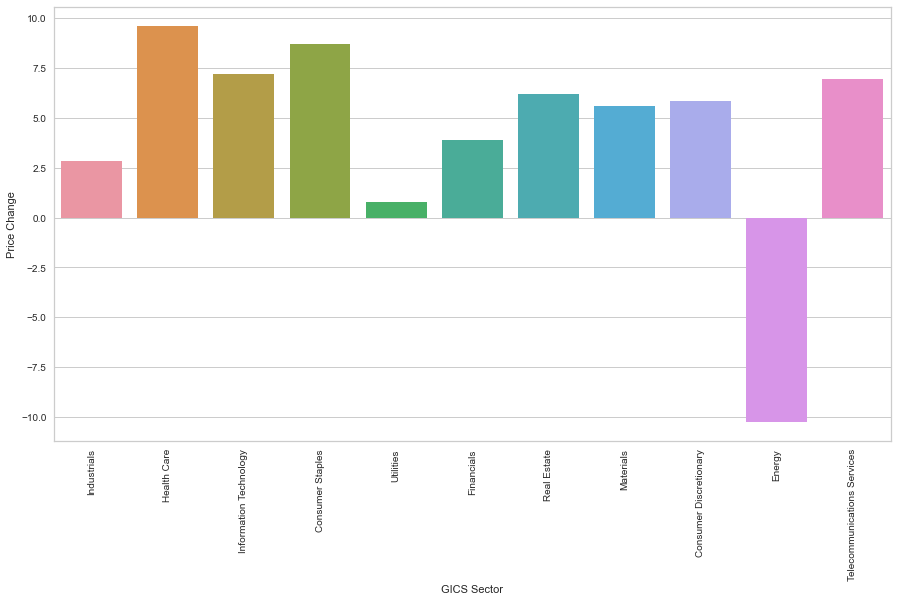

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The Healthcare sector has the highest price increase on average.

**How are the different variables correlated with each other?**

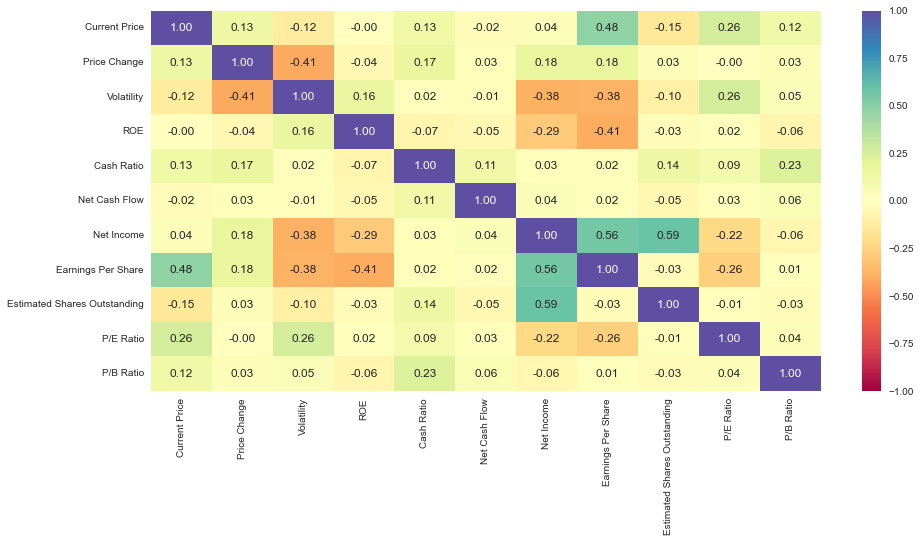

<IPython.core.display.Javascript object>

In [50]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
- There is a mild correlation between `Earnings Per Share` and `Net Income` (0.56).
- There is a mild correlation between `Estimated Shares Outstanding` and `Net Income` (0.59).
- There is a mild correlation between `Earnings Per Share` and `Current Price` (0.48).

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

In [51]:
df.groupby(["GICS Sector"])["Cash Ratio"].mean()


GICS Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

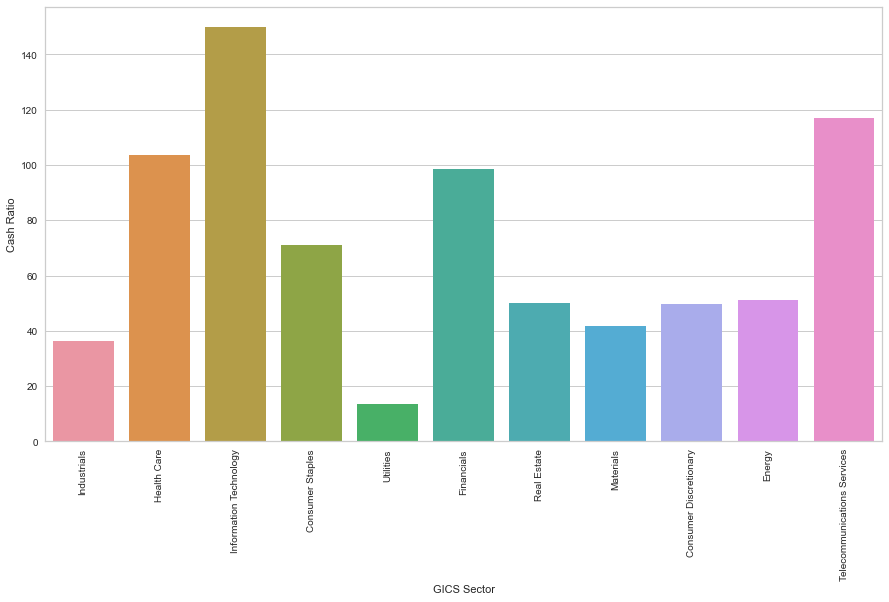

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Information Technology, Telecommunication Services, Healthcare, Financials, and Consumer Staples are the top 5 sectors with high cash ratio.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

In [53]:
df.groupby(["GICS Sector"])["P/E Ratio"].mean()


GICS Sector
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Energy                         72.897709
Financials                     16.023151
Health Care                    41.135272
Industrials                    18.259380
Information Technology         43.782546
Materials                      24.585352
Real Estate                    43.065585
Telecommunications Services    12.222578
Utilities                      18.719412
Name: P/E Ratio, dtype: float64

<IPython.core.display.Javascript object>

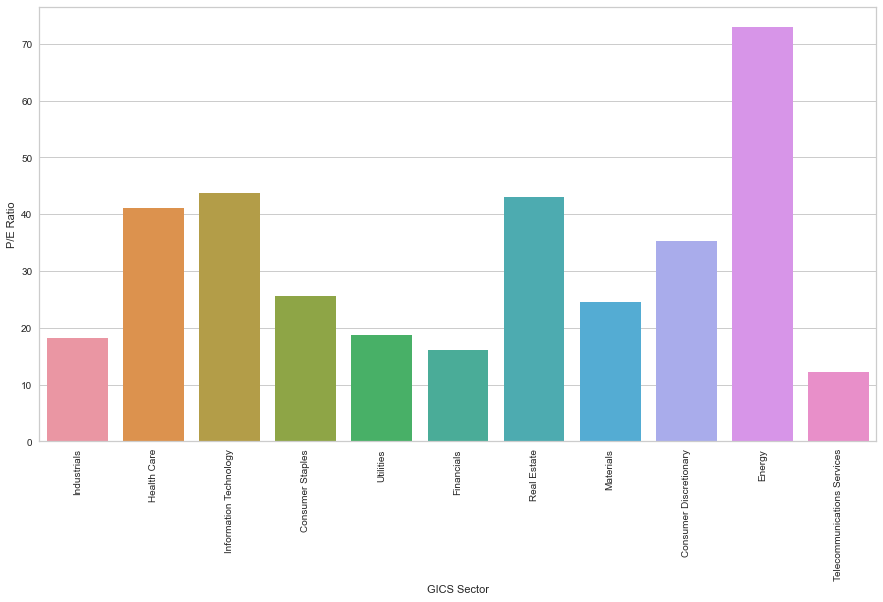

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The Energy sector has the highest P/E ratio follows by Information Technology, Real Estate and Healthcare.


## Data Preprocessing

- Duplicate value check: **No Duplication found**
- Missing value treatment: **No missing value found**
- Outlier check: **No treatment needed**
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Outlier Check**

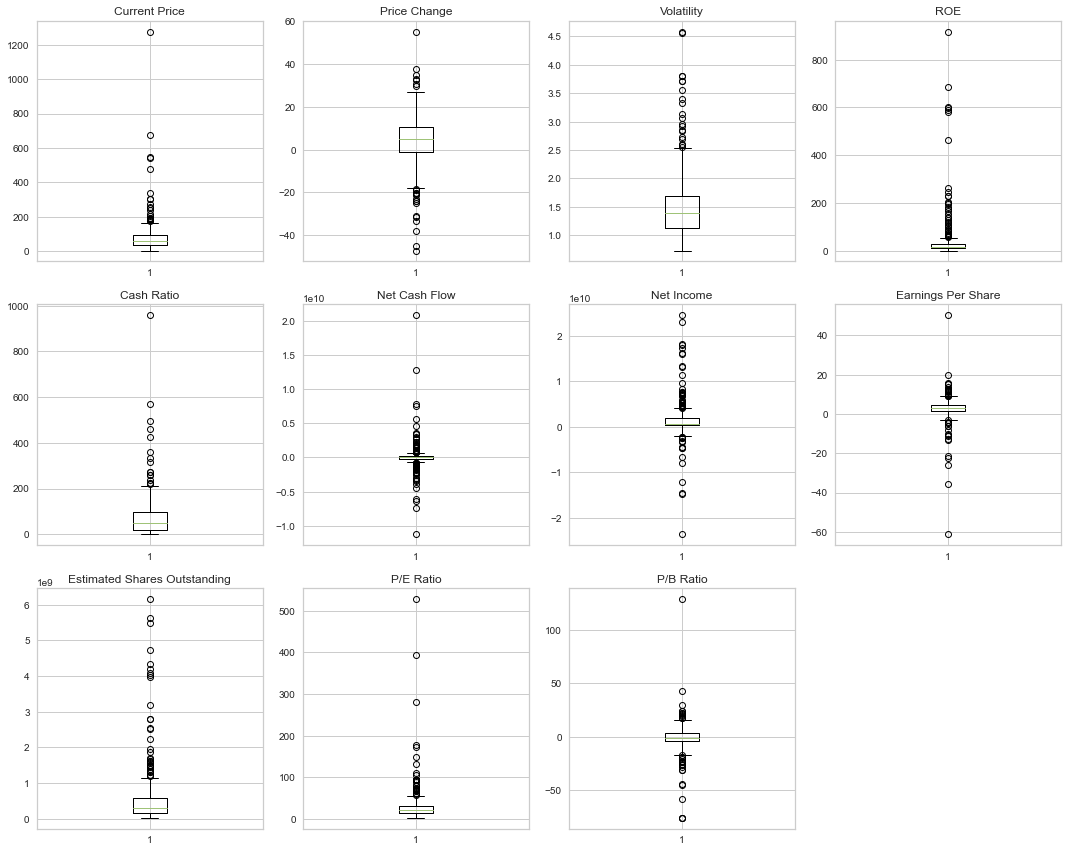

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(15, 12))

#comprise all numerical columns into a list
num_cols = df.select_dtypes(include=np.number).columns.tolist()

#boxplot all the numerical columns
for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

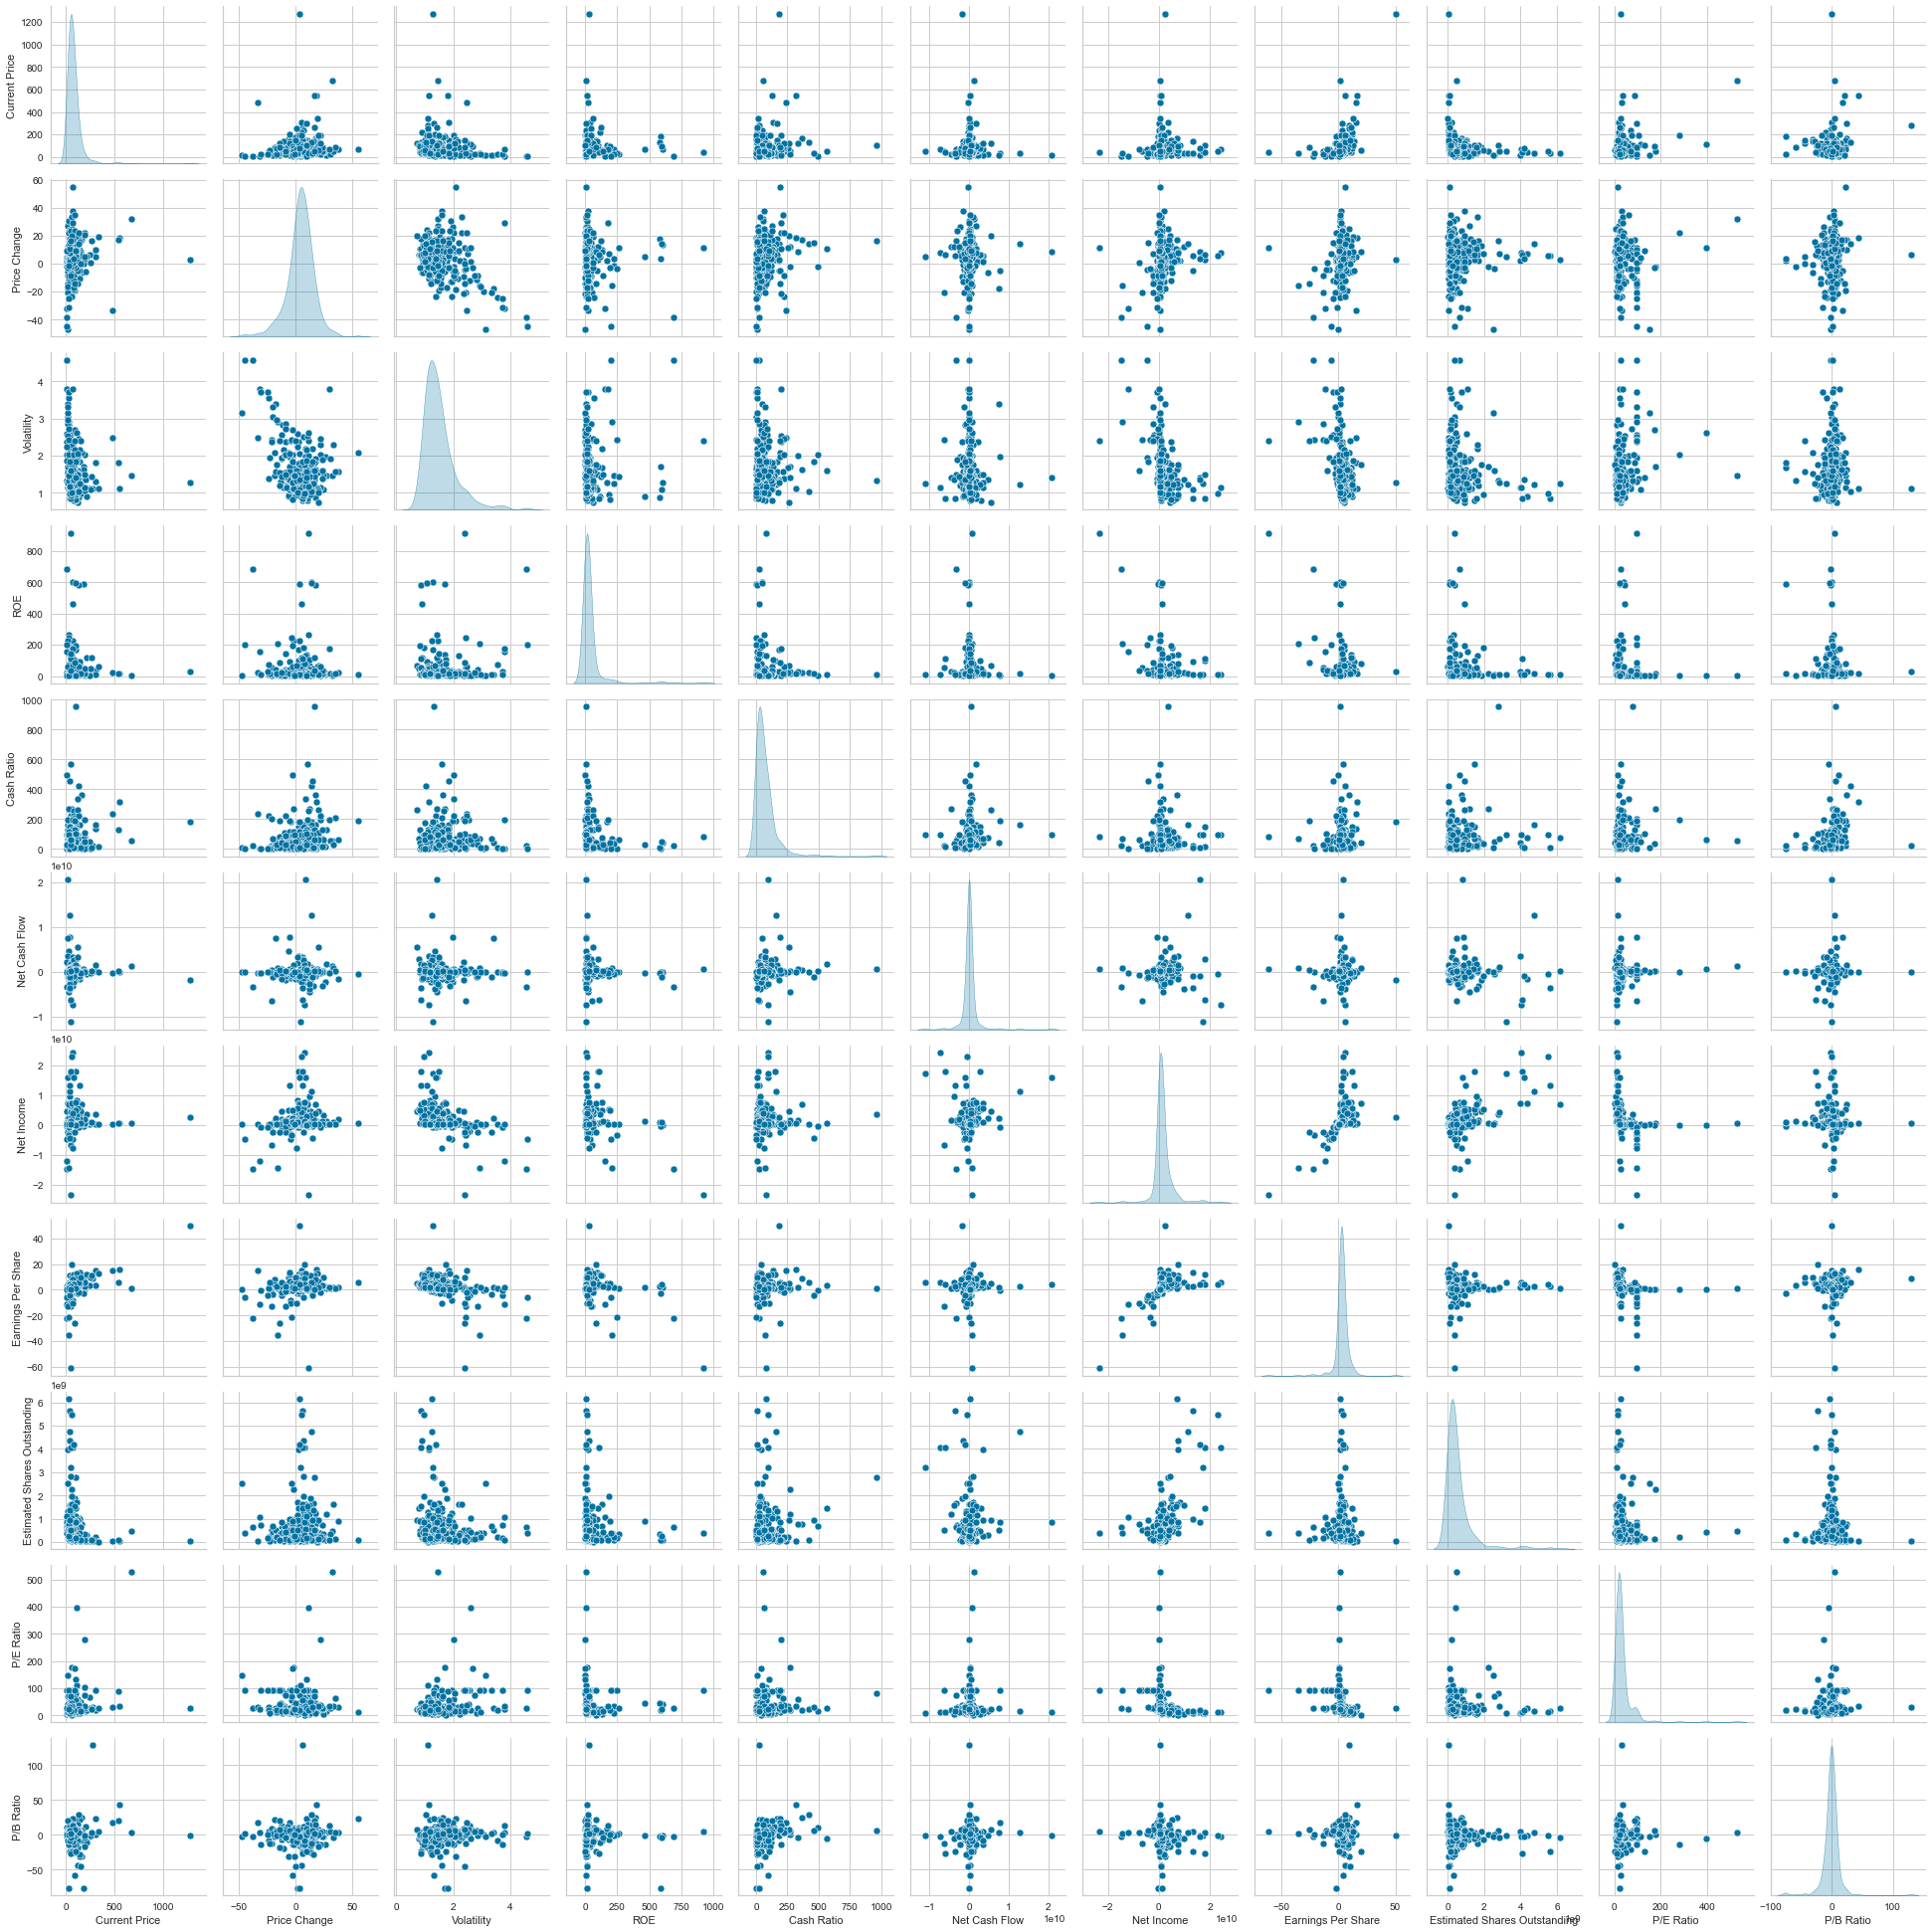

<IPython.core.display.Javascript object>

In [56]:
sns.pairplot(df, diag_kind="kde")


### Scaled Data

In [57]:
# set up a scaler
scaler = StandardScaler()

# create a sub-dataset for all numerical columns
subset = df[num_cols].copy()

# scaling the data before clustering
subset_scaled = scaler.fit_transform(subset)

# Create dataframe of the scaled data and add the column names
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

**Preview the scaled data**

In [58]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

## K-means Clustering

In [59]:
# create a copy for kmean clustering from the scaled sub-dataset
kmeans_df = subset_scaled_df.copy()

# choose a range of cluster from 2 to 10
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(kmeans_df)
    prediction = model.predict(kmeans_df)
    distortion = (
        sum(np.min(cdist(kmeans_df, model.cluster_centers_, "euclidean"), axis=1))
        / kmeans_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1240741476529146
Number of Clusters: 6 	Average Distortion: 2.0631260952168367
Number of Clusters: 7 	Average Distortion: 2.0282845999843793
Number of Clusters: 8 	Average Distortion: 1.9840746380555503
Number of Clusters: 9 	Average Distortion: 1.9159000677571332


<IPython.core.display.Javascript object>

**Visualize using KElbowVisualizer**

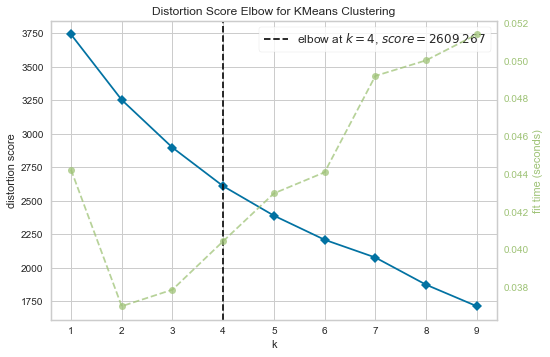

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [60]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(kmeans_df)
visualizer.show()

**Observations:**
- According to the KElbowVisualizer, the suggested optimal number of cluster is 4.

## Checking the Silhouete Score

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.43169988466492354)
For n_clusters = 6, the silhouette score is 0.36698524210914063)
For n_clusters = 7, the silhouette score is 0.10587349598463779)
For n_clusters = 8, the silhouette score is 0.40021596082234684)
For n_clusters = 9, the silhouette score is 0.4051539505522535)


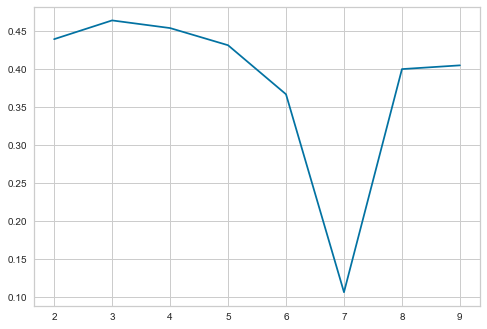

<IPython.core.display.Javascript object>

In [61]:
sil_score = []
cluster_list = range(2, 10)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((kmeans_df))
    score = silhouette_score(kmeans_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Observations:**
- Based on the Silhouete score, 3 or 4 clusters are optimal

**n_clusters = 3**

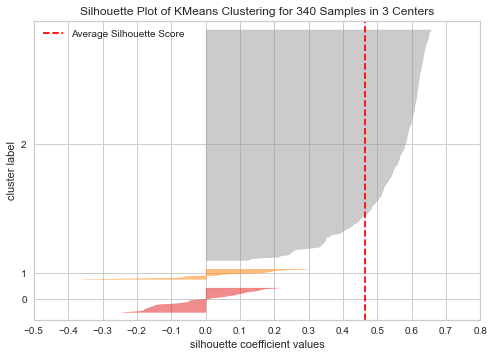

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(kmeans_df)
visualizer.show()

**n_clusters = 4**

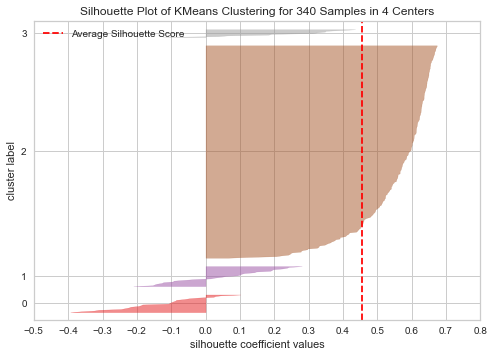

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [63]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(kmeans_df)
visualizer.show()

**Final Model**

Let's take 4 as the optimal number of cluster as the silhouete score is high enough (0.45), all clusters are seem to be separate from each others, and there is a knick in the elbow at 4 in the elbow curve.

In [64]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(kmeans_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [65]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
kmeans_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## K-Means Cluster Profiling

In [66]:
km_cluster_profile = df1.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

# display the cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,243.226804,13.607350,1.742959,26.416667,285.083333,754548500.000000,976137166.666667,6.122917,567201602.563333,77.542325,15.041637,24
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,72.199223,5.078363,1.388428,34.517986,53.165468,60694949.640288,1534031769.784173,3.623040,439996194.215863,23.804667,-3.350239,278
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11


<IPython.core.display.Javascript object>

In [67]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'C

<IPython.core.display.Javascript object>

In [68]:
df1.groupby(["KM_segments", "GICS Sector"])["Security"].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          6
             Consumer Staples                1
             Energy                          1
             Health Care                     9
             Information Technology          5
             Real Estate                     1
             Telecommunications Services     1
1            Energy                         22
             Industrials                     1
             Information Technology          3
             Materials                       1
2            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     46
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Teleco

<IPython.core.display.Javascript object>

**Observations KMeans Clustering:**
- cluster 0 (24 companies) in 7 business sectors, cluster 1 (27 companies) in 4 business sectors, cluster 2 (278 companies) in all 11 listed business sector, cluster 3 (11 companies) in 7 business sectors.
- Cluster 0 : has the highest current stock price (243 dollars), highest percentage price change (13.6 percent), highest cash ratio (285.08), highest net cash flow (754 million dollars), highest earnings per share (6.12 dollar per share), highest P/B ratio (15.04) 
- Cluster 1 : has the highest volitality (2.91), highest ROE (107 percent), highest P/E ratio (90.6 percent).
- Cluster 2 : has the highest count in each segment, all other statistics are average.
- Cluster 3 : has the highest net income (14.8 billion dollars), highest estimated share outstanding (4.2 billion shares)

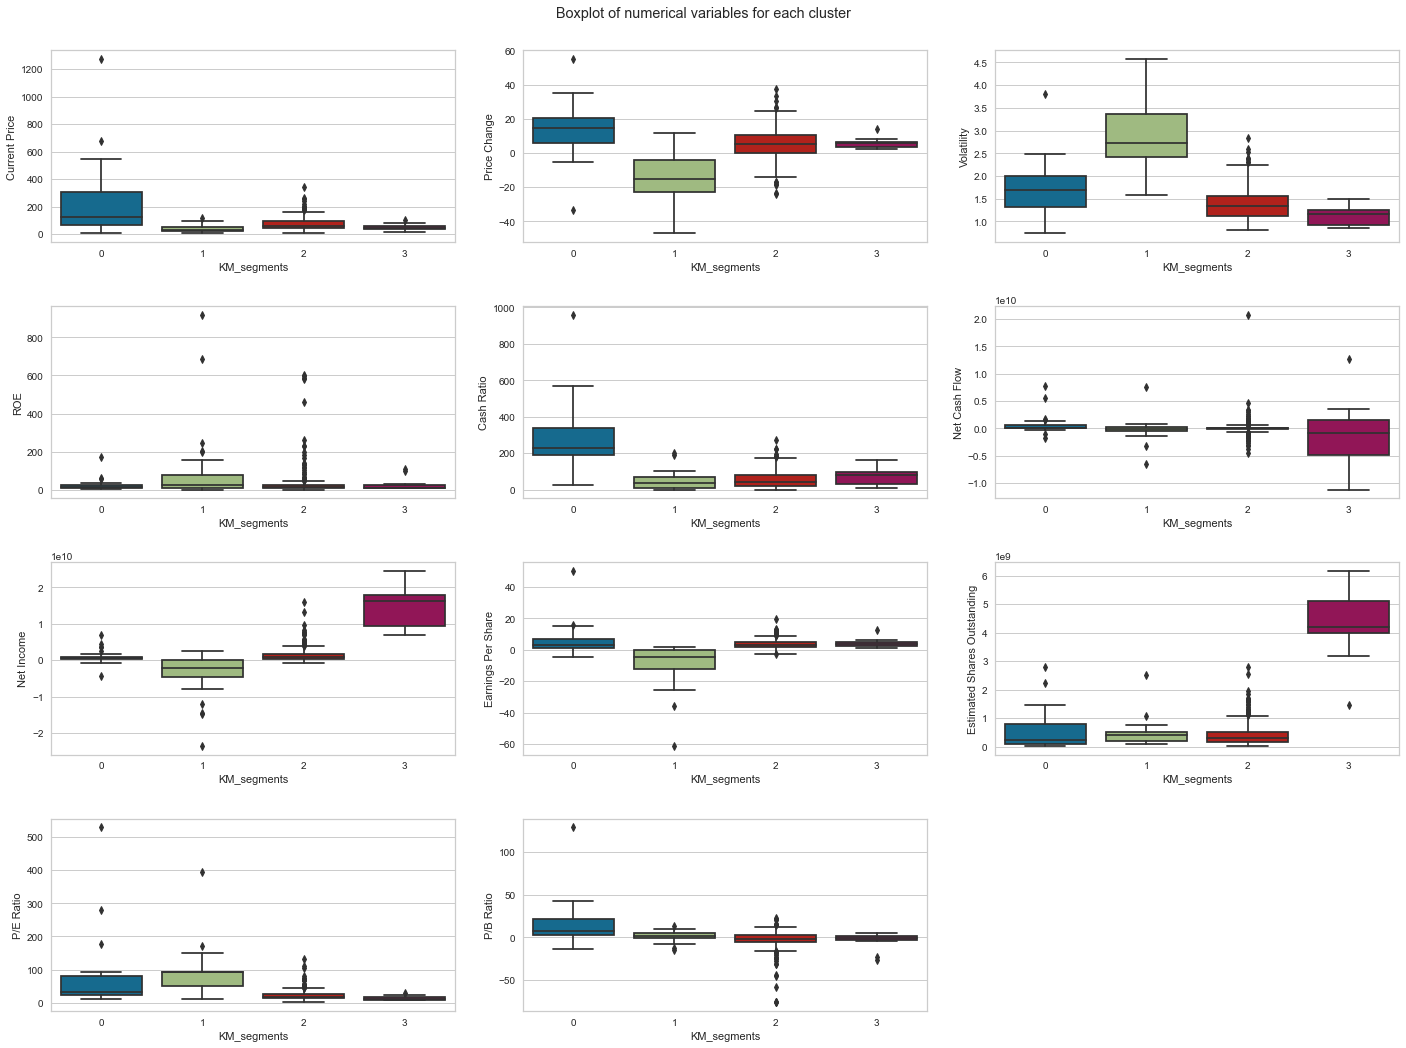

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights:
- **Cluster 0**: Firms in cluster 0 exhibit a combination of elevated stock prices and significant stock price increases. Additionally, they maintain a substantial cash reserve compared to liabilities, resulting in a high cash ratio. The positive and high net cash flow indicates that cash inflows surpass outflows. With an average earnings per share of 6 dollars, the highest among all clusters, and a P/B ratio of 15, suggesting a premium valuation, this cluster implies positive market sentiment, expectations of future growth, or robust profitability.

- **Cluster 1**: Companies in cluster 1 have the lowest stock prices among clusters, coupled with a negative net cash flow, indicating higher cash outflows than inflows. Consequently, these firms possess the lowest cash ratio, reflecting minimal cash reserves. Despite this, they exhibit the highest volatility and ROE, signifying efficient use of equity capital for profit generation. The high and positive P/E ratio suggests the market's optimistic outlook on future earnings growth, potentially leading investors to pay a premium for the stock.

- **Cluster 2**: Companies in cluster 2 are characterized by average attributes across various metrics and constitute the largest cluster. With an average stock price of 72 dollars and a positive percentage price change, they demonstrate reasonable performance. The ROE, though not as high as cluster 1, indicates effective management and resource allocation. However, the negative P/B ratio implies undervaluation according to book value, potentially presenting an opportunity for investors who believe the market underestimates the company's assets.

- **Cluster 3**: Similar to cluster 2, companies in cluster 3 have an average stock price of 50 dollars, accompanied by positive percentage price changes. Despite a significantly negative net cash flow, these companies exhibit the highest net income and issued the most outstanding shares. While the positive P/E ratio suggests a positive outlook on earnings, the negative P/B ratio implies undervaluation relative to book value, potentially making these stocks appealing to investors who see value in the underlying assets.



## Hierarchical Clustering

In [70]:
# create a copy of the scaled data for hierarchical clustering
hc_clus_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

### Checking Cophenetic Correlation

In [71]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_clus_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_clus_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

<IPython.core.display.Javascript object>

In [72]:
print(
    f"Highest cophenetic correlation is {round(high_cophenet_corr,3)}, which is obtained with {high_dm_lm[0].capitalize()} distance and {high_dm_lm[1]} linkage."
)

Highest cophenetic correlation is 0.942, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [73]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_clus_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_clus_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [74]:
print(
    f"Highest cophenetic correlation is {round(high_cophenet_corr,3)}, which is obtained with {high_dm_lm[1]} linkage.")


Highest cophenetic correlation is 0.942, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### Checking Dendrograms

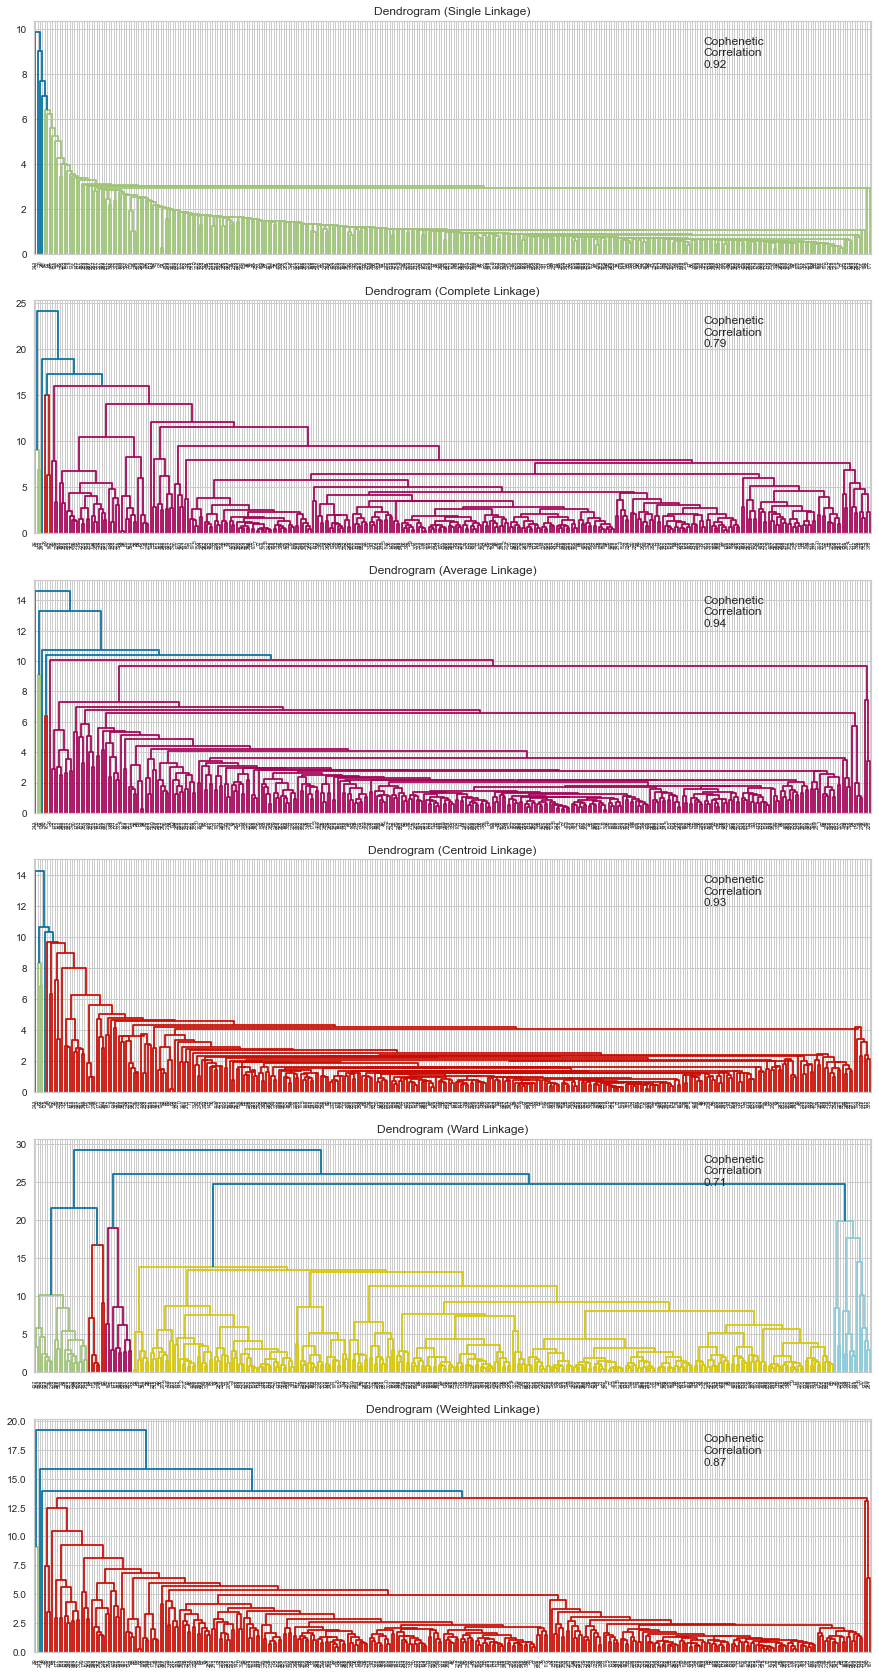

<IPython.core.display.Javascript object>

In [75]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_clus_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_clus_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Final Model:**
- The cophenetic correlation is highest for average methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [95]:
HCmodel = AgglomerativeClustering(
    n_clusters=6, affinity="euclidean", linkage="average"
)  #
HCmodel.fit(hc_clus_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

In [96]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_clus_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Hierarchical Cluster Profiling

In [97]:
hc_cluster_profile = df2.groupby("HC_segments").mean()
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
5,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


<IPython.core.display.Javascript object>

In [98]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

<IPython.core.display.Javascript object>

In [99]:
df2.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
4            Information Technology          1
5            Financials                      1
             Information Technology          1
Name: Security, dtype: int64

<IPython.core.display.Javascript object>

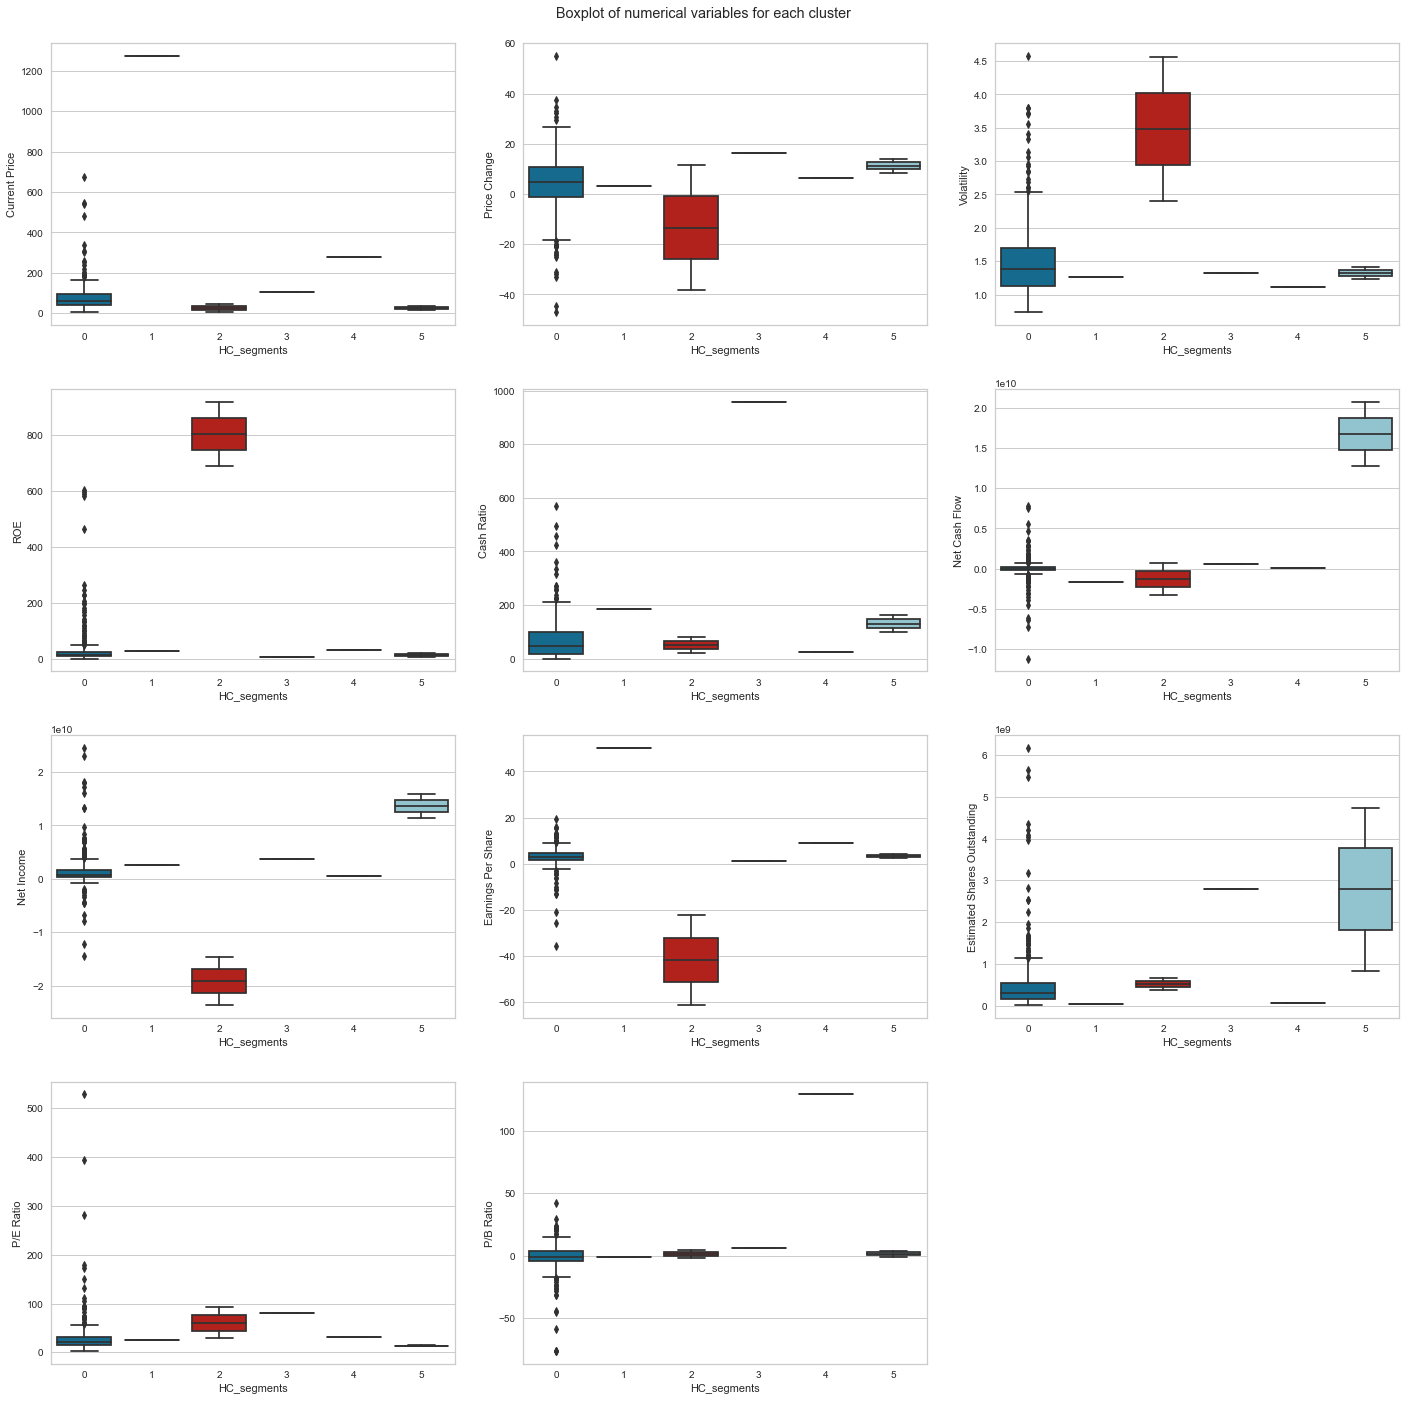

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights:
- **Cluster 0**: Companies within this cluster exhibit an average stock price of 77 dollars, with a 4% increase in the percentage price change. The average Return on Equity (ROE) stands at a notable 35%, indicating a positive signal for the company's ability to yield returns on equity capital. Despite a negative net cash flow, suggesting cash outflows exceeding inflows and resulting in a low cash ratio, the cluster maintains an average P/E ratio of 32.4. This implies high market expectations for future earnings growth, potentially indicating investor willingness to pay a premium for anticipated strong performance. However, the negative P/B ratio suggests undervaluation according to the company's net asset value, presenting an opportunity for investors who perceive the market undervaluing the company's assets.

- **Cluster 1**: The sole firm in this cluster, Priceline.com Inc, boasts the highest stock price across all clusters, and its earnings per share (EPS) is also the highest at 50 dollars per share. The negative P/B ratio signals potential undervaluation based on the company's net asset value, creating an opportunity for investors who believe the market undervalues the company's assets.

- **Cluster 2**: Comprising two firms, Apache Corporation and Chesapeake Energy, this cluster stands out for having the highest volatility and Return on Equity (ROE). However, it also has the lowest earnings per share (-41.8), indicating a net loss, which may be a concern for investors. Both net cash flow and net income are negative.

- **Cluster 3**: Facebook is the sole firm in this cluster, characterized by a high percentage stock price change, the highest cash ratio, and relatively high net cash flow and net income. Facebook issued the most shares, and its EPS is 1.31. The high P/E ratio suggests optimistic market expectations for future earnings growth, while the positive P/B ratio indicates a premium valuation, possibly driven by positive market sentiment, expectations of growth, or strong profitability.

- **Cluster 4**: Alliance Data Systems, the only firm in this cluster, exhibits performance similar to Facebook, with a higher stock price. Despite the highest P/B ratio among all clusters (129), an uncommon and extreme valuation, it might signify the market's extremely high expectations for future growth, profitability, or other factors.

- **Cluster 5**: Comprising Bank of America Corp and Intel Corp, this cluster showcases above-average performance with an average stock price of 25 dollars per share and an 11% price change percentage. Both companies have the highest net cash flow and net income across all clusters. Positive EPS at 3.29, along with positive P/E and P/B ratios, indicates potential future growth and premium valuation.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- **Which clustering technique took less time for execution?**
> The K-Means Clustering technique took less time. Graphing the dendrogram for the hierarchical clustering could be time-consuming. 
- **Which clustering technique gave you more distinct clusters, or are they the same?**
> The hiearchical clustering gave more distince clusters.
- **How many observations are there in the similar clusters of both algorithms?**
> For *`K-Means Clustering`*: cluster 0 (24 companies), cluster 1 (27 companies) , cluster 2 (278 companies) , cluster 3 (11 companies). 
> For *`Hierarchical Clustering`*, cluster 0 (333 companies), cluster 1 (1 company) , cluster 2 (2 companies) , cluster 3 (1 company), cluster 4 (1 company), and cluster 5 (2 companies).
- **How many clusters are obtained as the appropriate number of clusters from both algorithms?**
> 4 clusters for K-Means Clustering, 6 clusters for Hierarchical Clustering.


## Actionable Insights and Recommendations

- I prefer the clusters from K-Means Cluster because it provides a variety of companies in each clusters that have similar attributes and performances. 
- Investors are recommended to consider companies in the Kmeans Cluster to invest and diversify portfolio.
- Some clusters in the Hierachical Cluster in also worth consideration since there are not many varieties within clusters. 

**For KMeans Cluster Profile:**
-  In Cluster 0, investors are looking at high-value stock price companies with high EPS and substantial cash reserves, and cash ratio. P/E and P/B ratio suggest that these companies is at a premium valuation and have positive market sentiment and high expectation for future growth and profitability.

- In Cluster 1, investors are looking at low-value stock price companies, these firms possess the lowest cash ratio, reflecting minimal cash reserves coupled with a negative net cash flow, indicating higher cash outflows than inflows. Despite this, they exhibit the highest volatility and ROE, signifying efficient use of equity capital for profit generation.

- In Cluster 3: investors are looking at middle-value companies with average stock price of 50 dollars accompanied by positive percentage price changes. These companies have a postive P/E ratio suggest a positive outlook on earnings and negative P/B ratio which implise undervaluation to the the book value, potentially making these stocks appealing to investors who see value in the underlying assets.

**For Hierarchical Cluster Profile:**
- Cluster 3: Facebook is the sole firm in this cluster, well-known for its reputation, characterized by a high percentage stock price change, the highest cash ratio, and relatively high net cash flow and net income. Facebook issued the most shares, and its EPS is 1.31. The high P/E ratio suggests optimistic market expectations for future earnings growth, while the positive P/B ratio indicates a premium valuation, possibly driven by positive market sentiment, expectations of growth, or strong profitability.

- Cluster 4: Alliance Data Systems exhibits performance similar to Facebook, with a higher stock price. Despite the highest P/B ratio among all clusters (129), an uncommon and extreme valuation, it might signify the market's extremely high expectations for future growth, profitability, or other factors.

- Cluster 5: Comprising Bank of America Corp and Intel Corp, this cluster showcases above-average performance with an average stock price of 25 dollars per share and an 11% price change percentage. Both companies have the highest net cash flow and net income across all clusters. Positive EPS at 3.29, along with positive P/E and P/B ratios, indicates potential future growth and premium valuation.

# <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

## Univariate Analysis

**`Current Price`**: Current stock price in dollars

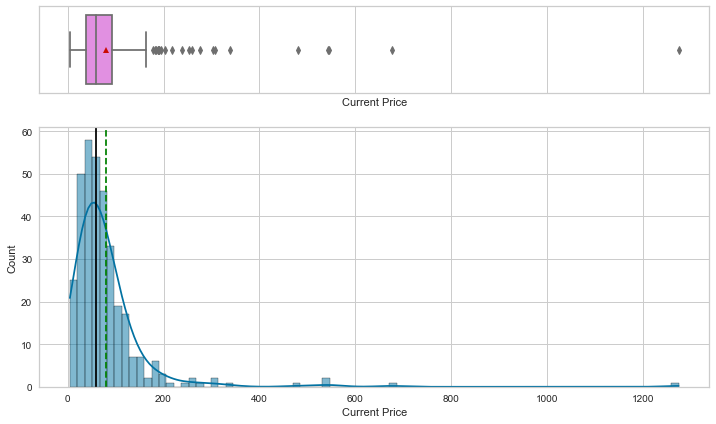

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "Current Price")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`Price Change`**: Percentage change in the stock price in 13 weeks

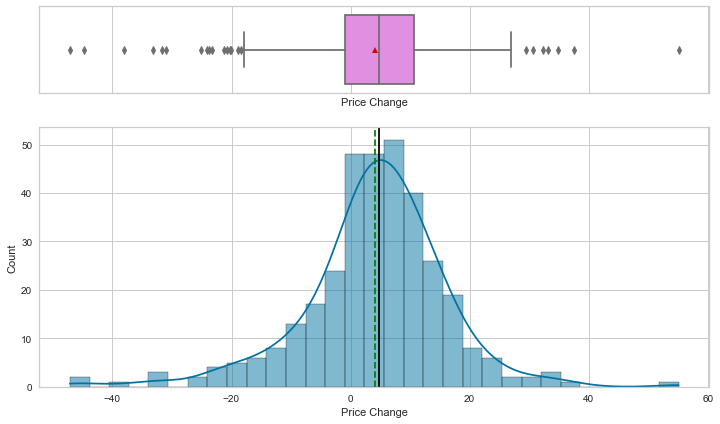

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "Price Change")

**Observations:**
- The distribution is approximately normal
- There is sign of outliers.

**`Volatility`**: Standard deviation of the stock price over the past 13 weeks

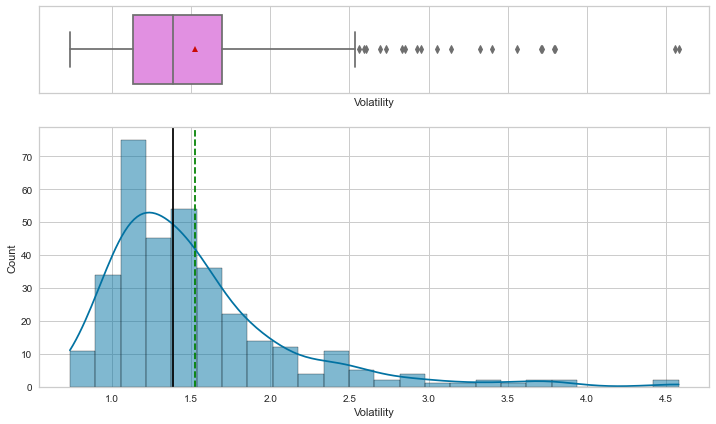

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "Volatility")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`ROE`**: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)

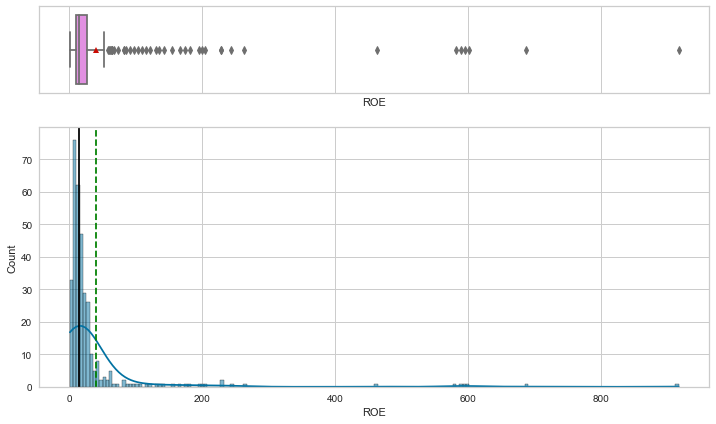

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "ROE")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`Cash Ratio`**: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities

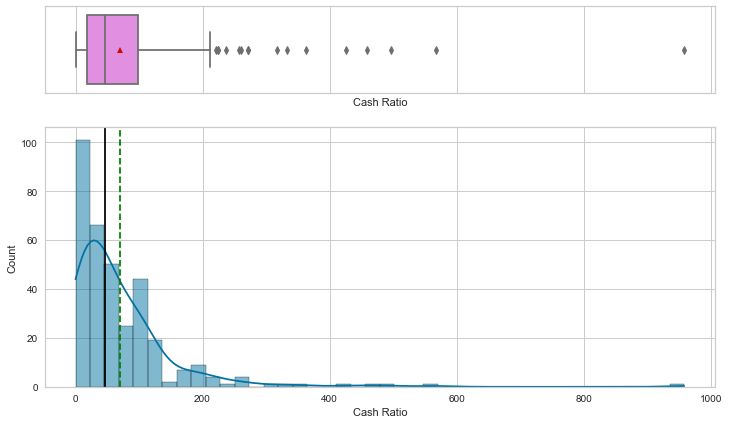

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Cash Ratio")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`Net Cash Flow`**: The difference between a company's cash inflows and outflows (in dollars)

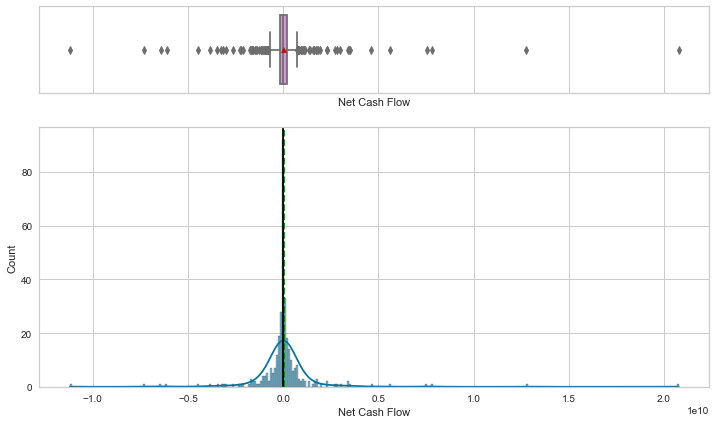

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Net Cash Flow")

**Observations:**
- The distribution is approximately normal.
- There is sign of outliers.

**`Net Income`**: Revenues minus expenses, interest, and taxes (in dollars)

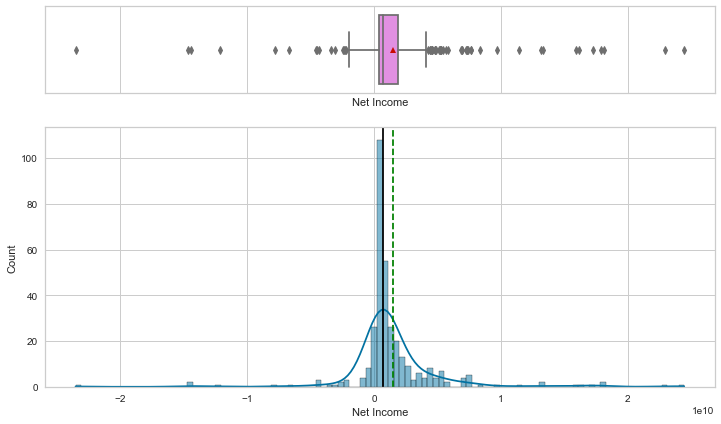

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Net Income")

**Observations:**
- The distribution is approximately normal.
- There is sign of outliers.

**`Earnings Per Share`**: Company's net profit divided by the number of common shares it has outstanding (in dollars)

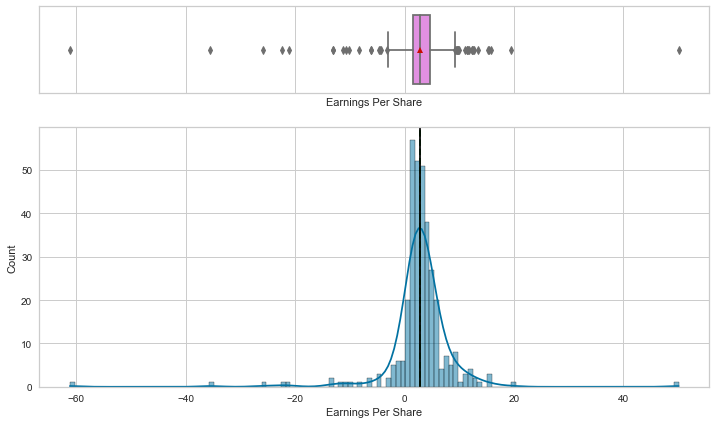

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Earnings Per Share")

**Observations:**
- The distribution is approximately normal.
- There is sign of outliers.

**`Estimated Shares Outstanding`**: Company's stock currently held by all its shareholders

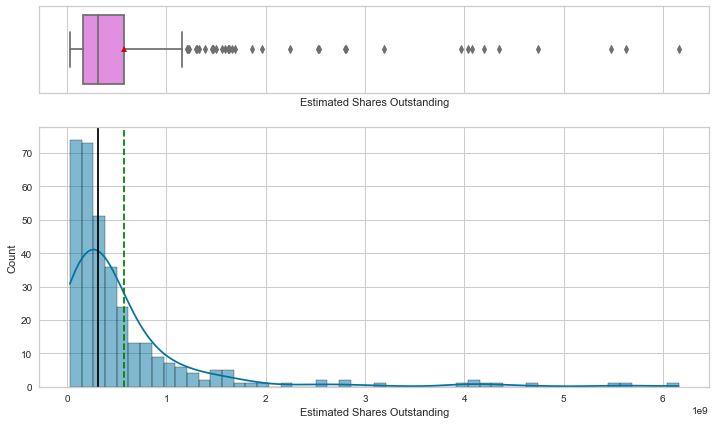

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Estimated Shares Outstanding")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`P/E Ratio`**: Ratio of the company's current stock price to the earnings per share 

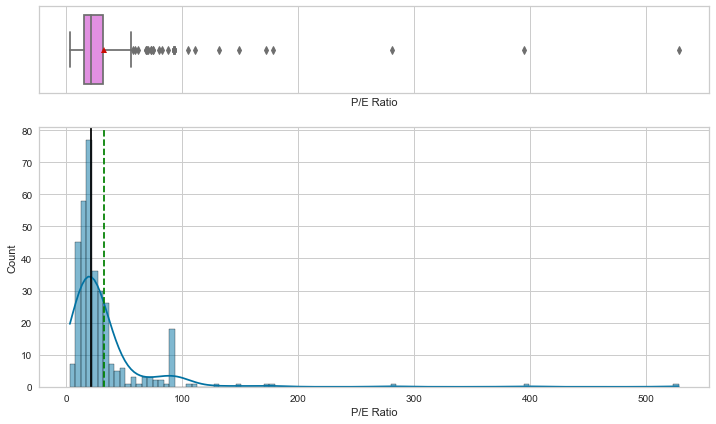

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "P/E Ratio")

**Observations:**
- The distribution is left-skewed.
- There is sign of outliers.

**`P/B Ratio`**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

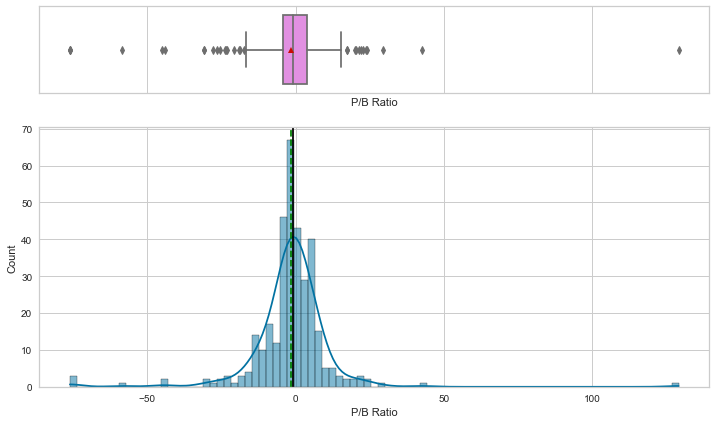

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "P/B Ratio")

**Observations:**
- The distribution is approximately normal.
- There is sign of outliers.

**`GICS Sector`**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations


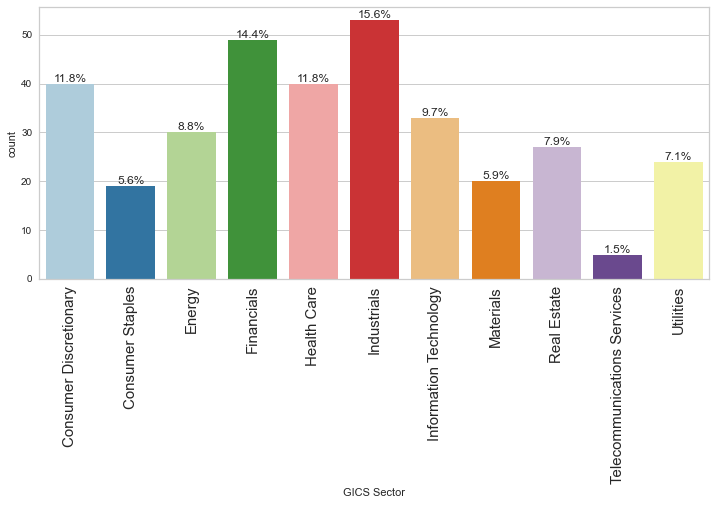

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "GICS Sector")

**Observations:**
- There are 11 sectors.
- Industrials, Financials, Healthcare, Consumer Discretionary and Information Technology are the top 5 sectors.

**`GICS Sub Industry`**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

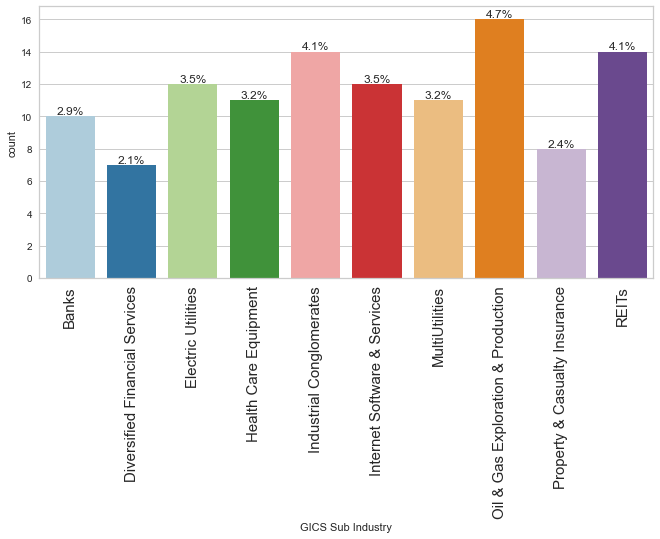

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "GICS Sub Industry", n=10)

In [24]:
df["GICS Sub Industry"].nunique()

104

<IPython.core.display.Javascript object>

**Observation:**
- There are 104 Sub-Industries.
- Oil & Gas Exploration & Production is the number one sub industry follows by REITs and Industrial Conglomerates.


## Bivariate Analysis

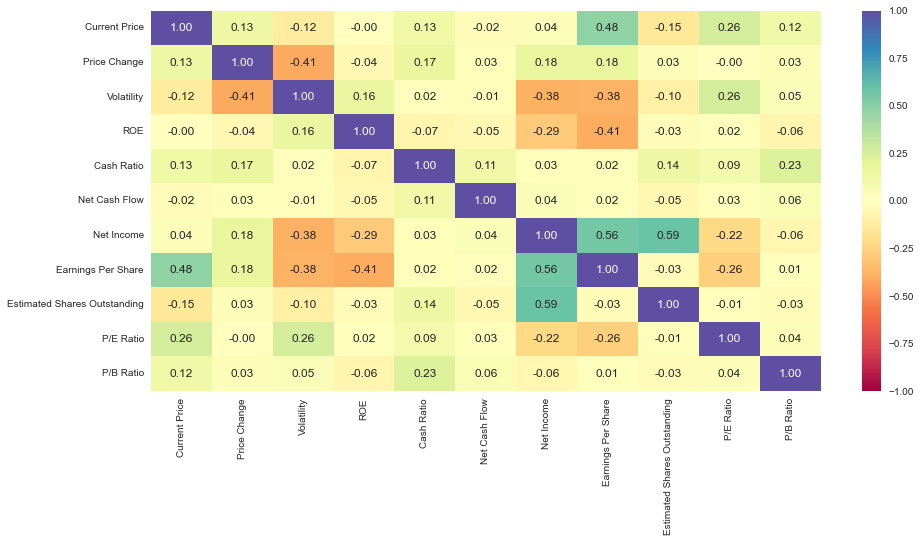

<IPython.core.display.Javascript object>

In [25]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
- There is a mild correlation between `Earnings Per Share` and `Net Income` (0.56).
- There is a mild correlation between `Estimated Shares Outstanding` and `Net Income` (0.59).
- There is a mild correlation between `Earnings Per Share` and `Current Price` (0.48).

**`GICS Sector`** and **`Current Price`**

In [26]:
data.groupby(["GICS Sector"])["Current Price"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,128.095404,223.699868,14.090000,36.379998,67.200001,102.177500,1274.949951
Consumer Staples,19.0,71.972807,25.919826,36.680000,47.246666,78.949997,91.234997,127.300003
Energy,30.0,46.042334,28.130190,4.500000,24.622501,39.255001,69.935000,105.370003
Financials,49.0,58.659183,32.230325,11.060000,33.480000,54.360001,72.180000,159.759995
Health Care,40.0,132.048250,116.442990,18.440001,67.174997,101.889999,142.970005,546.159973
Industrials,53.0,74.411807,44.926615,7.398807,45.099998,61.310001,92.680000,217.149994
Information Technology,33.0,63.548485,52.576790,10.630000,27.600000,52.630001,87.360001,276.570007
Materials,20.0,76.551500,56.122029,6.770000,40.007500,67.055000,99.715001,259.600006
Real Estate,27.0,90.976925,70.263134,15.340000,36.198480,80.690002,106.470001,302.399994


<IPython.core.display.Javascript object>

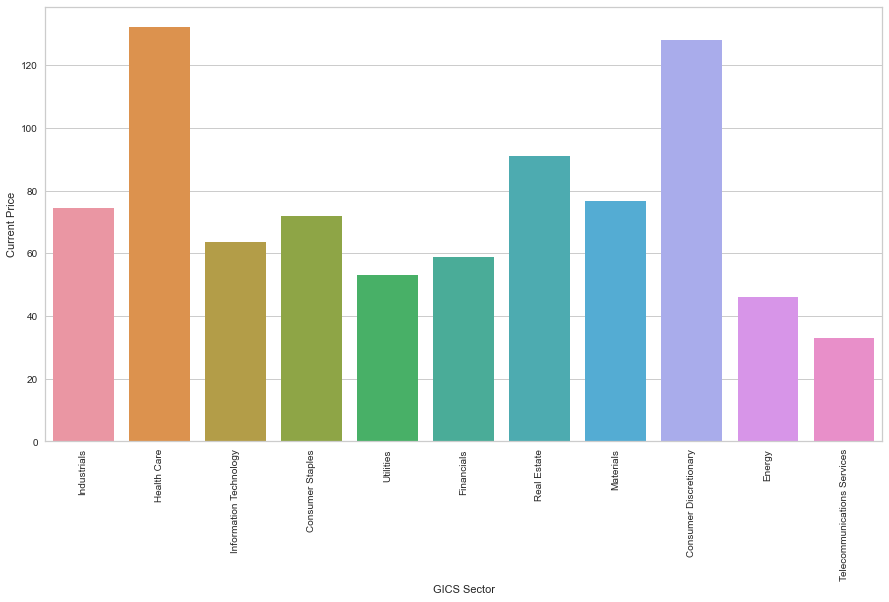

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Current Price", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Healthcare and Consumer Discretionary are top 2 sectors have the highest current stock price.

**`GICS Sector`** and **`Price Change`**

In [28]:
df.groupby(["GICS Sector"])["Price Change"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,5.846093,13.290771,-33.131268,1.227730,3.543658,12.249013,34.803917
Consumer Staples,19.0,8.684750,8.795128,-12.017268,5.426784,6.976738,12.605282,24.496225
Energy,30.0,-10.228289,16.939222,-47.129693,-20.668060,-9.244788,2.959008,17.341522
Financials,49.0,3.865406,6.024301,-14.292764,-0.361785,3.910301,7.696534,15.462833
Health Care,40.0,9.585652,9.848818,-12.532337,1.528455,10.324402,16.775604,33.177346
Industrials,53.0,2.833127,9.922247,-23.244191,-2.797977,3.952561,10.105078,20.432767
Information Technology,33.0,7.217476,14.462923,-23.790903,-1.827858,7.496965,14.035095,55.051683
Materials,20.0,5.589738,15.283690,-31.685167,-1.306572,4.906245,15.450133,37.489677
Real Estate,27.0,6.205548,5.623694,-13.067267,4.198144,7.578608,9.139503,15.573900


<IPython.core.display.Javascript object>

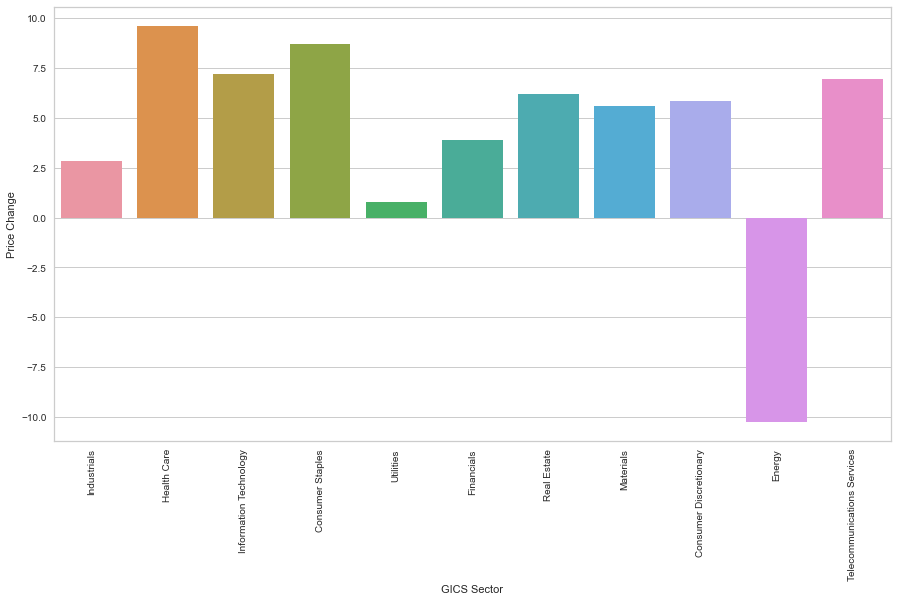

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Healthcare sector has the highest increase in price changes while Energy sector has the highest decrease in price changes.

**`GICS Sector`** and **`ROE`**

In [30]:
df.groupby(["GICS Sector"])['ROE'].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,44.900000,94.323176,4.0,14.00,20.0,31.75,589.0
Consumer Staples,19.0,89.421053,159.362729,5.0,15.50,26.0,51.50,582.0
Energy,30.0,93.200000,204.895836,1.0,6.75,20.5,49.75,917.0
Financials,49.0,26.285714,86.213156,2.0,8.00,10.0,14.00,596.0
Health Care,40.0,27.775000,40.933021,1.0,10.75,16.5,24.25,228.0
Industrials,53.0,50.150943,93.863935,2.0,14.00,23.0,36.00,601.0
Information Technology,33.0,21.787879,18.496212,5.0,10.00,16.0,26.00,92.0
Materials,20.0,33.000000,39.368703,2.0,10.00,22.0,29.75,155.0
Real Estate,27.0,12.444444,9.078009,4.0,7.00,10.0,16.00,48.0


<IPython.core.display.Javascript object>

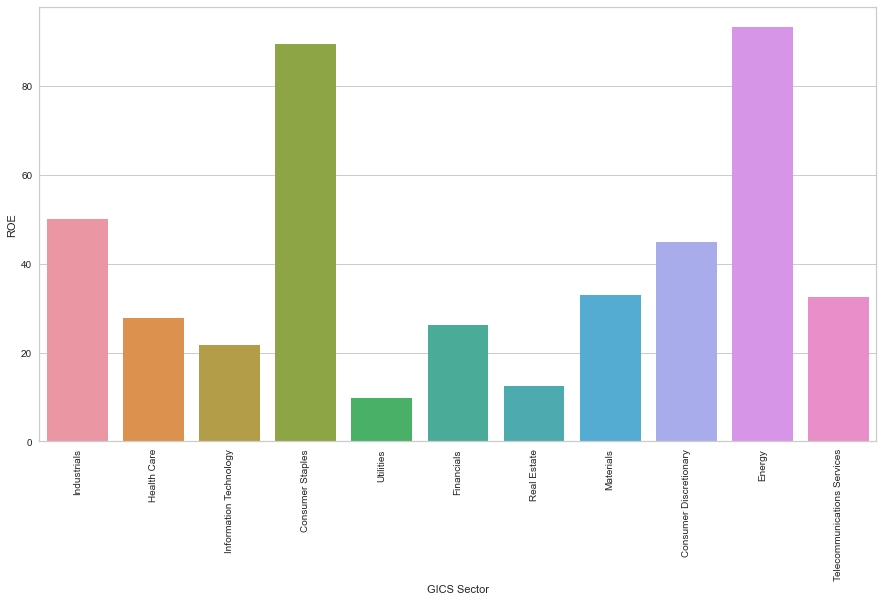

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="ROE", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Energy and Consumer Staples sectors has the highest ROE. The Utilities sector has the lowest ROE.

**`GICS Sector`** and **`Cash Ratio`**

In [32]:
df.groupby(["GICS Sector"])["Cash Ratio"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,49.575000,69.208302,0.0,11.5,25.0,35.50,260.0
Consumer Staples,19.0,70.947368,125.832549,9.0,18.0,33.0,63.00,568.0
Energy,30.0,51.133333,55.939458,0.0,7.0,38.5,68.50,201.0
Financials,49.0,98.591837,17.907073,51.0,99.0,99.0,99.00,183.0
Health Care,40.0,103.775000,104.118150,3.0,41.5,70.0,128.25,425.0
Industrials,53.0,36.188679,29.127080,1.0,15.0,31.0,44.00,130.0
Information Technology,33.0,149.818182,174.231429,16.0,45.0,126.0,180.00,958.0
Materials,20.0,41.700000,50.396428,2.0,10.0,25.0,49.50,198.0
Real Estate,27.0,50.111111,28.250709,12.0,47.0,47.0,47.00,164.0


<IPython.core.display.Javascript object>

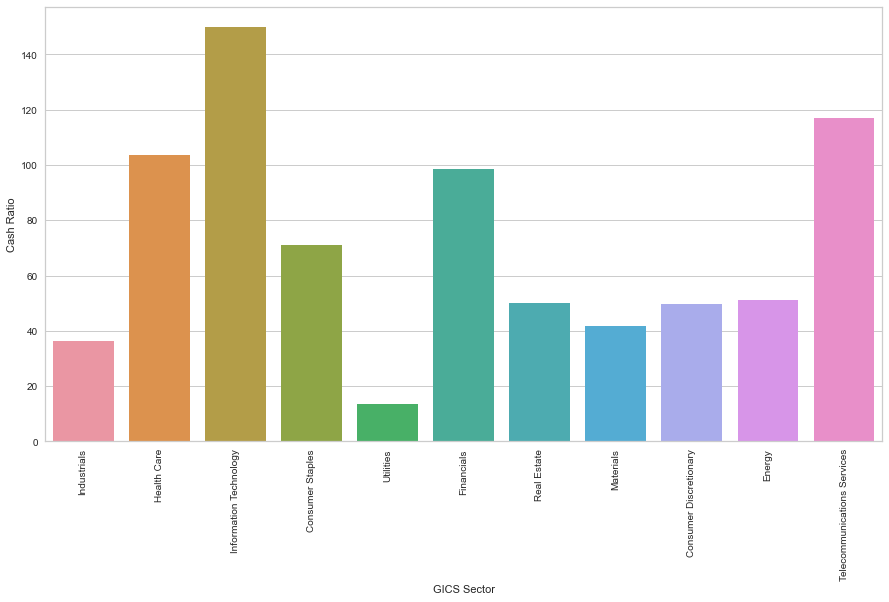

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Information Technology, Telecommunication Services, Healthcare, Financials, and Consumer Staples are the top 5 sectors with high cash ratio.

**`GICS Sector`** and **`Net Cash Flow`**

In [34]:
df.groupby(["GICS Sector"])["Net Cash Flow"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,8.421318e+07,1.309715e+09,-3.857000e+09,-1.933782e+08,-14092500.0,77445750.0,5.607600e+09
Consumer Staples,19.0,2.586272e+08,1.007863e+09,-1.649000e+09,-1.346500e+08,13065000.0,326850000.0,2.962000e+09
Energy,30.0,-3.083182e+08,2.095710e+09,-6.430000e+09,-9.107812e+08,-66575000.0,261132250.0,7.786000e+09
Financials,49.0,2.543563e+08,3.685237e+09,-1.120800e+10,-2.950000e+08,10000000.0,497000000.0,2.076400e+10
Health Care,40.0,2.626878e+08,9.657313e+08,-3.186000e+09,-8.997000e+06,123650000.0,443218750.0,3.428000e+09
Industrials,53.0,-1.601032e+08,5.827880e+08,-2.214800e+09,-2.717880e+08,-42800000.0,46300000.0,1.630000e+09
Information Technology,33.0,4.830991e+08,2.821981e+09,-4.496000e+09,-2.408400e+08,50823000.0,315120000.0,1.274700e+10
Materials,20.0,-2.912368e+08,8.113337e+08,-2.276034e+09,-4.301888e+08,-4950000.0,94946750.0,9.153250e+08
Real Estate,27.0,3.546704e+06,4.264563e+08,-1.039361e+09,-2.645750e+07,2212000.0,22028500.0,1.617921e+09


<IPython.core.display.Javascript object>

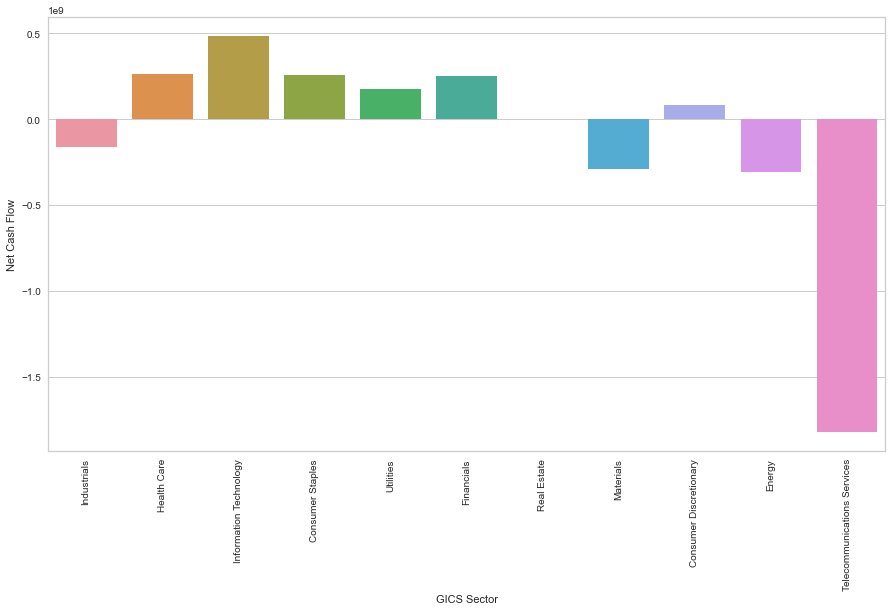

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Net Cash Flow", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Information Technology sector has the highest postive net cash flow while Telecommunications Services sector has the highest negative net cash flow.
- Healthcare, Information Technology, Consumer Staples, Utilities, Financials, and Consumer Discretionary sectors have positive net cash flow while Industrals, Materials, Energy, and Telecommunications Services sectors have negtive net cash flow.

**`GICS Sector`** and **`Net Income`**

In [36]:
df.groupby(["GICS Sector"])["Net Income"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,1.373450e+09,2.203885e+09,-2.710000e+08,4.495285e+08,6.136510e+08,1.034000e+09,9.687000e+09
Consumer Staples,19.0,2.518833e+09,2.676162e+09,3.595000e+08,5.913945e+08,1.013000e+09,5.239000e+09,7.351000e+09
Energy,30.0,-2.087527e+09,6.871261e+09,-2.352800e+10,-3.285500e+09,-7.413425e+08,2.327328e+08,1.615000e+10
Financials,49.0,3.202678e+09,5.370807e+09,1.415550e+08,8.400000e+08,1.385000e+09,2.533000e+09,2.444200e+10
Health Care,40.0,2.018515e+09,3.254048e+09,-5.563340e+08,3.493650e+08,6.947640e+08,2.198850e+09,1.810800e+10
Industrials,53.0,1.722373e+09,2.083795e+09,-3.220000e+08,3.550000e+08,6.960670e+08,2.181000e+09,7.610000e+09
Information Technology,33.0,1.701587e+09,3.115494e+09,-4.359082e+09,4.740000e+08,7.635000e+08,1.623600e+09,1.319000e+10
Materials,20.0,2.785165e+08,3.082700e+09,-1.215600e+10,2.868190e+08,5.769500e+08,1.015037e+09,4.476000e+09
Real Estate,27.0,5.677757e+08,5.090900e+08,-5.592350e+08,2.839250e+08,4.875620e+08,7.510835e+08,2.139375e+09


<IPython.core.display.Javascript object>

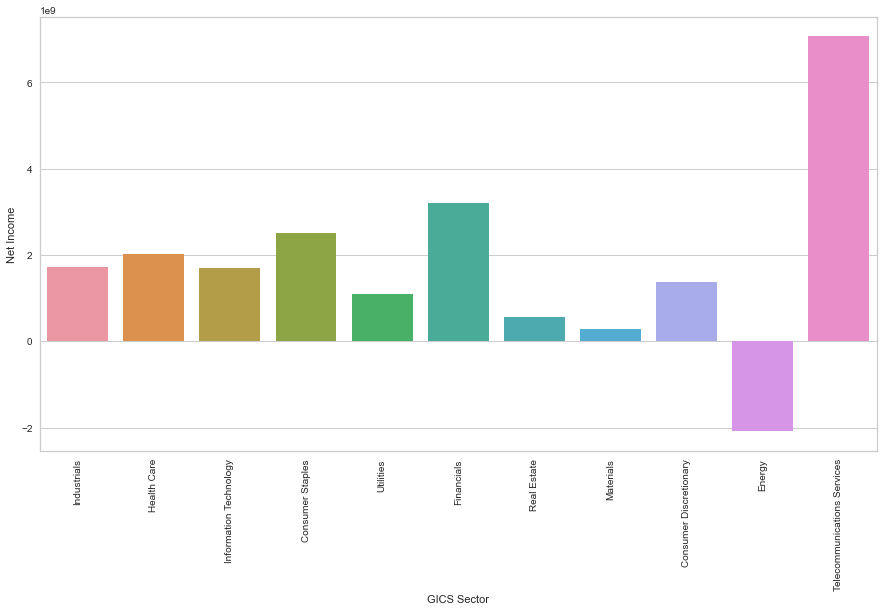

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Net Income", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- All sectors have positive net income except for the Energy sectors.
- The Telecommunications Services sector has the highest net income.

**`GICS Sector`** and **`Earnings Per Share`**

In [ ]:
df.groupby(["GICS Sector"])["Earnings Per Share"].describe()


In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Earnings Per Share", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Only the Energy sector has negative earnings per share.
- Consumer Discretionary, Industrials, Healthcare, Financial and Telecommunications Services are sectors with top 5 high earnings per share.

**`GICS Sector`** and **`Estimated Shares Outstanding`**

In [38]:
df.groupby(["GICS Sector"])["Estimated Shares Outstanding"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,3.996513e+08,6.792422e+08,3.108510e+07,1.234088e+08,2.135983e+08,2.995878e+08,3.963978e+09
Consumer Staples,19.0,9.136852e+08,1.037331e+09,1.278981e+08,1.992378e+08,4.913916e+08,1.469542e+09,4.349704e+09
Energy,30.0,6.635288e+08,8.363082e+08,9.293781e+07,2.279085e+08,4.224191e+08,6.705724e+08,4.194805e+09
Financials,49.0,6.838773e+08,9.949166e+08,5.437302e+07,2.578925e+08,4.153086e+08,5.664336e+08,5.477033e+09
Health Care,40.0,6.845955e+08,1.088745e+09,2.767216e+07,1.349337e+08,2.357307e+08,8.330397e+08,6.159292e+09
Industrials,53.0,3.547169e+08,2.810225e+08,3.606838e+07,1.331687e+08,2.401866e+08,5.322359e+08,1.038710e+09
Information Technology,33.0,8.282789e+08,9.384204e+08,6.695185e+07,1.896200e+08,5.139877e+08,1.128571e+09,4.738589e+09
Materials,20.0,3.085246e+08,2.682774e+08,6.700510e+07,1.335147e+08,2.476503e+08,3.731470e+08,1.074801e+09
Real Estate,27.0,3.444540e+08,4.588271e+08,5.777662e+07,1.582994e+08,2.603358e+08,3.625735e+08,2.536364e+09


<IPython.core.display.Javascript object>

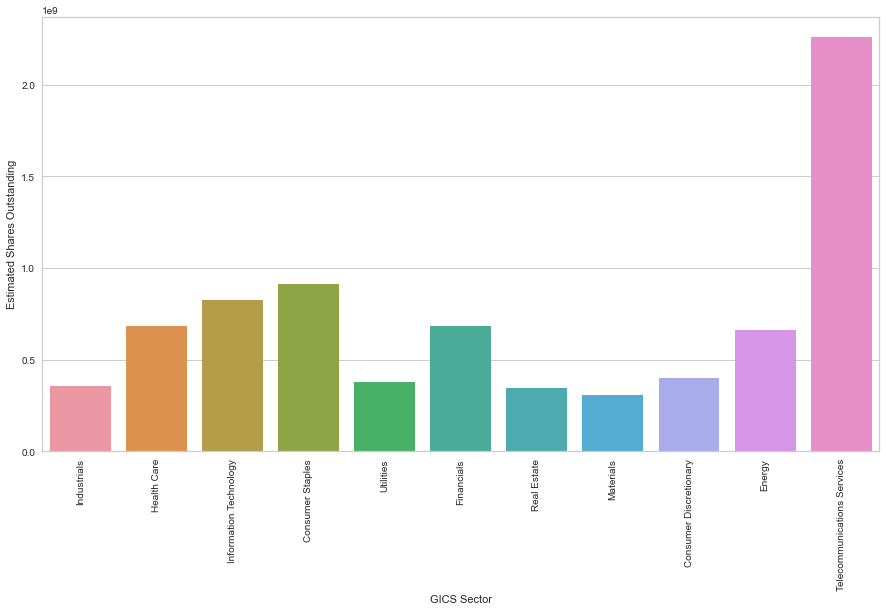

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="Estimated Shares Outstanding", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The Telecommunication Services sector has the highest estimated shares outstanding follows by Consumer Staples and Information Technology sectors.

**`GICS Sector`** and **`P/E Ratio`**

In [40]:
df.groupby(["GICS Sector"])["P/E Ratio"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,35.211613,80.902902,5.566284,15.459391,20.819876,25.887634,528.039074
Consumer Staples,19.0,25.521195,10.291193,9.986637,21.391092,24.070121,26.176366,48.412370
Energy,30.0,72.897709,42.144306,8.429600,28.407929,93.089287,93.089287,171.962965
Financials,49.0,16.023151,7.281892,4.304511,10.914049,14.276451,18.703854,38.721154
Health Care,40.0,41.135272,46.756416,8.180275,19.165522,27.967442,35.700025,280.514706
Industrials,53.0,18.259380,7.587633,2.935451,13.048485,17.334711,20.556076,41.199999
Information Technology,33.0,43.782546,70.242260,10.209198,18.249407,25.309524,31.040405,394.413783
Materials,20.0,24.585352,12.349729,9.033264,16.001852,22.811951,32.226881,57.210844
Real Estate,27.0,43.065585,22.799372,13.164179,28.294875,33.685393,48.266787,110.764709


<IPython.core.display.Javascript object>

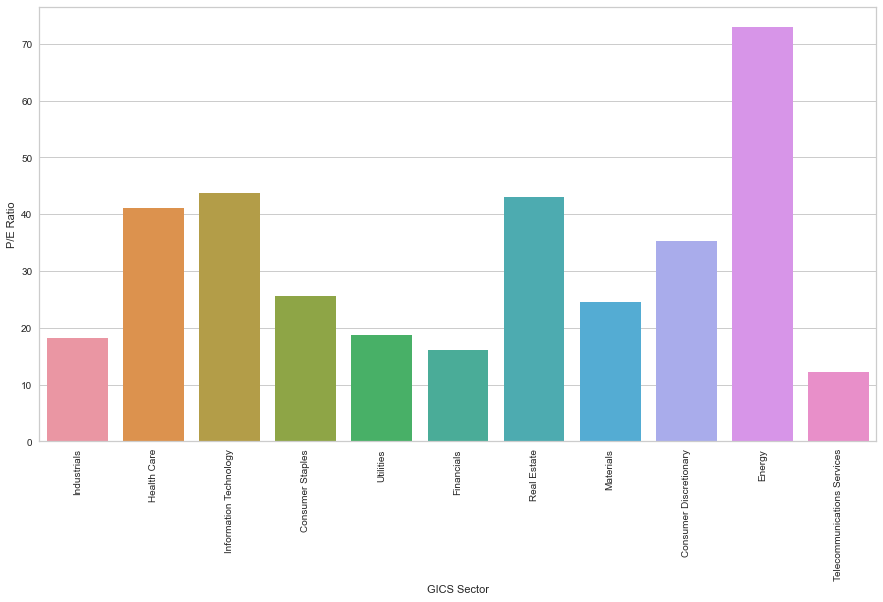

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The Energy sector has the highest P/E ratio follows by Information Technology, Real Estate and Healthcare.


**`GICS Sector`** and **`P/B Ratio`**

In [42]:
df.groupby(["GICS Sector"])["P/B Ratio"].describe()


,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,-8.253543,22.966646,-76.119077,-8.540070,-0.857290,4.062135,17.201329
Consumer Staples,19.0,-4.554003,7.235275,-25.385129,-6.826390,-2.256747,-1.723395,7.496831
Energy,30.0,2.539738,7.110238,-14.561121,-1.029292,1.600930,6.148169,17.345857
Financials,49.0,-4.270505,10.448804,-58.649536,-4.327138,-1.883912,-0.694126,19.821416
Health Care,40.0,0.068869,13.459471,-31.006773,-4.378092,-0.522637,4.784414,42.607500
Industrials,53.0,-0.979266,9.589105,-23.195292,-8.116821,0.902439,4.291894,22.032612
Information Technology,33.0,6.377128,22.969945,-19.086610,1.059810,3.954975,4.852391,129.064585
Materials,20.0,0.723103,7.302259,-14.928867,-1.124095,2.880396,5.287814,11.168107
Real Estate,27.0,-3.003320,7.085986,-20.813577,-3.973395,-3.089477,-1.269332,23.856728


<IPython.core.display.Javascript object>

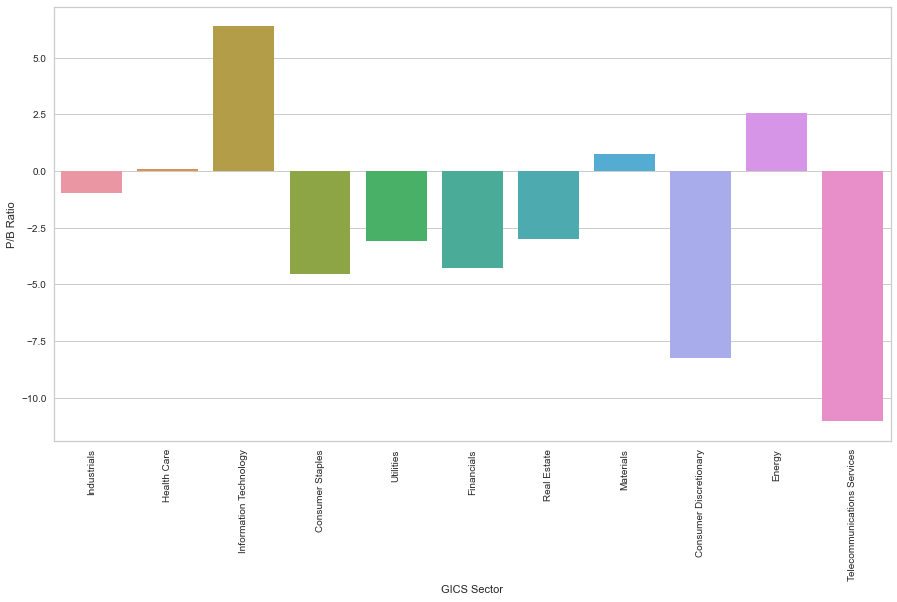

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="GICS Sector", y="P/B Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The majority of all sectors has negative P/B ratio except for Information Technolgy, Materials and Energy sectors.
- The Telecommunication Services sectors has the highest negative P/B Ratio follows by Consumer Discretionary.
- The Information Technology has the highest positive P/B ratio.